In [2]:
import math
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import metrics

# Display plots in the notebook
%matplotlib inline

# Plotting parameters 
plt.rcParams['figure.figsize'] = (10, 7)
plt.rcParams['font.size'] = 12

In [3]:
# load files
rffile = 'http://localhost:8888/tree/data/RF.csv'
Urffile = 'http://localhost:8888/tree/data/unknownRF.csv'

rf = pd.read_csv(rffile, header=0, na_filter=False, index_col=0)
Urf = pd.read_csv(Urffile, header=0, na_filter=False, index_col=0)

In [4]:
# linear regression model evaluation

# Features are Frequency, MeanSignalStrength, Latitude and Longitude
X = rf.drop(['TransmitterDistance'], axis=1)

# Labels are TransmitterDistance
y = rf.TransmitterDistance

# fit
linreg = LinearRegression()
linreg.fit(X, y)

# print the coefficients
print linreg.intercept_
print linreg.coef_

feature_cols = ['Frequency', 'MeanAmplitude', 'Lat', 'Lon']
zip(feature_cols, linreg.coef_)

704.307229821
[   0.325409     -1.02370806 -104.39737391   -5.69172246]


[('Frequency', 0.32540900182290972),
 ('MeanAmplitude', -1.0237080598482122),
 ('Lat', -104.39737390783019),
 ('Lon', -5.691722457811796)]

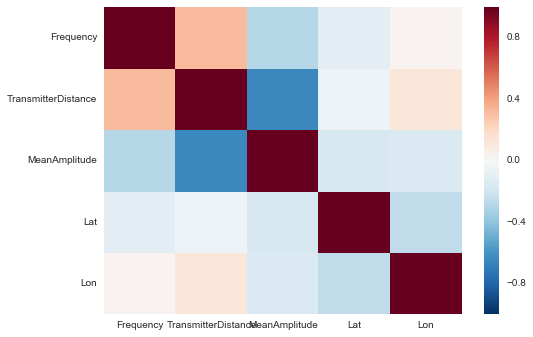

In [15]:
# Correlation Matrix
Xcorr = rf.corr()

# Plot correlation
import seaborn as sns

ax = sns.heatmap(Xcorr)

C:\Users\user\Anaconda2\lib\site-packages\ipykernel\__main__.py:21: FutureWarning:

sort(columns=....) is deprecated, use sort_values(by=.....)

C:\Users\user\Anaconda2\lib\site-packages\ipykernel\__main__.py:25: FutureWarning:

sort(columns=....) is deprecated, use sort_values(by=.....)

C:\Users\user\Anaconda2\lib\site-packages\ipykernel\__main__.py:29: FutureWarning:

sort(columns=....) is deprecated, use sort_values(by=.....)

C:\Users\user\Anaconda2\lib\site-packages\ipykernel\__main__.py:33: FutureWarning:

sort(columns=....) is deprecated, use sort_values(by=.....)



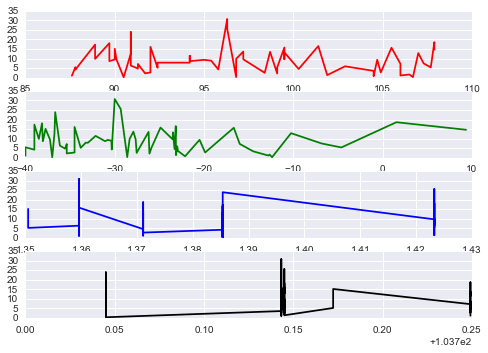

In [59]:
# Test train split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2)
linreg.fit(X_train, y_train)
y_pred = linreg.predict(X_test)

y_diff = np.abs(y_test - y_pred)

# Understanding what type of characteristics give the best results
#plt.figure()
y_diffDF = pd.DataFrame(y_diff)
y_diffDF.rename(columns={'TransmitterDistance':'Diff_yTnyP'}, inplace=True)

analysisDF = pd.concat([X_test, y_diffDF], axis=1)

ax1 = plt.subplot(411)
ax2 = plt.subplot(412)
ax3 = plt.subplot(413)
ax4 = plt.subplot(414)

# Relation between the magnitude of errors and Frequency
aDF_Freq = analysisDF.sort('Frequency')
ax1.plot(aDF_Freq.Frequency, aDF_Freq.DifferenceTD, 'r', label='Frequency')

# Relation between the magnitude of errors and Mean Amplitude
aDF_MA = analysisDF.sort('MeanAmplitude')
ax2.plot(aDF_MA.MeanAmplitude, aDF_Freq.DifferenceTD, 'g', label='Mean Amplitude')

# Relation between the magnitude of errors and Latitude
aDF_Lat = analysisDF.sort('Lat')
ax3.plot(aDF_Lat.Lat, aDF_Lat.DifferenceTD, 'b', label='Latitude')

# Relation between the magnitude of errors and Longitude
aDF_Lon = analysisDF.sort('Lon')
ax4.plot(aDF_Lon.Lon, aDF_Lon.DifferenceTD, 'k', label='Longitude')

In [63]:
# Take a closer look at the predictions which are accurate to 1 km. 
# What are the characteristics of these training examples

aDFs = analysisDF.sort('DifferenceTD')
TrEgAcc = aDFs[aDFs['DifferenceTD'] <= 1]
TrEgAcc

C:\Users\user\Anaconda2\lib\site-packages\ipykernel\__main__.py:4: FutureWarning:

sort(columns=....) is deprecated, use sort_values(by=.....)



,Frequency,MeanAmplitude,Lat,Lon,DifferenceTD
113,90.5,-6.836364,1.385351,103.745053,0.166446
156,106.7,-27.545455,1.385351,103.745053,0.255080
128,96.8,-4.618182,1.385351,103.745053,0.286710
147,104.5,-27.909091,1.385351,103.745053,0.727061


In [66]:
analysisDF.head()

,Frequency,MeanAmplitude,Lat,Lon,DifferenceTD
20,95.0,-23.476190,1.423272,103.844975,9.328157
149,104.9,-25.867925,1.385351,103.745053,2.707690
30,99.5,-22.120000,1.423272,103.844975,9.652845
54,91.3,-12.375000,1.359603,103.843286,4.734462
147,104.5,-27.909091,1.385351,103.745053,0.727061


In [125]:
# The best predictions come from the same radio station

# load data on radio stations
f = 'http://localhost:8888/tree/data/RadioStations.xlsx'
RadioStations = pd.read_excel(f)

# drop unwanted columns 
drop_cols = ['p', 'm', 'RDS-PS', 'RDS-PI', 'program', 
         'power', 'dB']

RS = RadioStations.drop(drop_cols, 1).sort_values(['MHz']).reset_index()
RS = RS.drop('index', 1)
RS.head(10)

,MHz,ctry,location,LAT,LONG,L1,L2,L3,L4,L5
0,87.6,INS,Batam Centre (KR-bat),1.133333,104.050000,39.495,34.086,43.997,31.206,28.724
1,87.8,MLA,Johor Bahru/Gunung Pulai (jhr),1.603333,103.546389,38.773,42.718,32.800,45.874,51.704
2,88.0,INS,Batam Centre (KR-bat),1.133333,104.050000,39.495,34.086,43.997,31.206,28.724
3,88.3,SNG,Singapore (cs),1.351944,103.765833,11.849,8.655,4.376,11.842,20.501
4,88.9,SNG,Singapore (cs),1.351944,103.765833,11.849,8.655,4.376,11.842,20.501
5,89.7,SNG,Singapore/Bukit Batok-Mediacorp (cs),1.351556,103.766194,11.848,8.619,4.434,11.802,20.465
6,90.0,INS,Batam/RRI (KR-bat),1.123417,103.945550,35.178,28.627,36.687,26.537,27.552
7,90.1,MLA,Johor Bahru/Gunung Pulai (jhr),1.603333,103.546389,38.773,42.718,32.800,45.874,51.704
8,90.5,SNG,Singapore/Bukit Batok-Mediacorp (cs),1.351556,103.766194,11.848,8.619,4.434,11.802,20.465
9,90.9,INS,Batam Centre/RRI (KR-bat),1.050000,104.050000,47.367,41.405,50.412,38.826,37.433


In [124]:
# Cluster data points according to radio station

groupbyRSfrequency = analysisDF.groupby(['Lat','Lon','Frequency'])
clusterRS = groupbyRSfrequency.describe()

# map clusterRS(Lat,Lon) to RS(LAT,LONG) columns (MHz, ctry, location, lat/lon of receivers)
#clusterRS.pivot(index=clusterRS.index, columns='Frequency', values='DifferenceTD')

DifferenceTD  MeanAmplitude
Lat      Lon        Frequency                                   
1.350483 103.872321 90.0      count      1.000000            1.0
                              mean      15.124124          -39.0
                              std             NaN            NaN
                              min       15.124124          -39.0
                              25%       15.124124          -39.0

In [129]:
analysisDF.sort('Frequency').head(20)

C:\Users\user\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: FutureWarning:

sort(columns=....) is deprecated, use sort_values(by=.....)



,Frequency,MeanAmplitude,Lat,Lon,DifferenceTD
44,87.6,-34.500000,1.359603,103.843286,1.018620
2,87.8,-37.750000,1.423272,103.844975,5.452343
106,87.8,-30.780000,1.385351,103.745053,4.194129
3,88.0,-37.250000,1.423272,103.844975,6.619985
109,88.9,9.351852,1.385351,103.745053,17.332824
5,88.9,-26.210526,1.423272,103.844975,9.824426
6,89.7,-33.809524,1.423272,103.844975,18.086040
202,89.7,-28.333333,1.371094,103.949197,8.645442
111,90.0,-28.600000,1.385351,103.745053,9.509562
164,90.0,-39.000000,1.350483,103.872321,15.124124
